TFRecord Format:
===
In this competition we're classifying 104 types of flowers based on their images drawn from five different public datasets. This competition is different in that images are provided in TFRecord format.

To make things easier, it will be better if we have basic understanding of dataset and how to experiment with different methods faster even on Google Colab without limiting yourself.

# Overview
This notebook describes all the different elements of TFRecord format. Obviously, to cover everything, it has to be fairly long. I have only covered the basics on using TFRecord on image data. I will be updating it in few weeks and I encourage everyone to read Tensorflow core tutorials as it has covered all the concpets thoroughly.

# What is TFRecord?
> As per Tensorflow's documentation, " ... approach is to convert whatever data you have into a supported format. This approach makes it easier to mix and match data sets and network architectures. The recommended format for TensorFlow is a TFRecords file containing tf.train.Example protocol buffers (which contain Features as a field)."

In Layman's terms, The TFRecord format is a simple format for storing a sequence of binary records.

So, why we even need a container for our image dataset we can simply extract our image into folder, read them into ram and then run, any image classification techniques. Well, There are plenty of reasons:
1.  Suppose you are experimenting with different image classification algorithms it is beneficial to do basic preprocessing and convert data into format that is faster to load. TFRecord makes that job easier. You can preprocess data and then convert it into TFRecord file. It will save your time and all you need to do read TFRecord file without any preprocessing and then, you can test your ideas on that dataset much faster without going to same step every time.
e.g., for pandas it is hdf5 files and for numpy it is npy, similarly for tensorflow, it is tfrecord files.

2. To dynamically shuffle at random places and also change the ratio of train:test:validate from the whole dataset. When you are working with an image dataset, what is the first thing you do? Split into Train, Test, Vaildate, sets, and then shuffle to not have any biased data distribution. In case of TFRecord, everything is in a single file and we can use that file to shuffle our dataset.


## Setup

In [1]:
#%tensorflow_version 2.x #only exists in Colab.

In [2]:
# import libraries
import math, re, os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as display
#from kaggle_datasets import KaggleDatasets
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE

Tensorflow version 2.9.1


Writing and Reading a TFRecord file
===
In practice, There are different types of input data but the process of creating a TFRecord file will be the same for each type of dataset:

1. Within each observation, each value needs to be converted to a `tf.train.Feature` containing one of the 3 compatible types, BytesList, FloaList,and Int64List. These are not python data types but tf.train.Feature types, that are used to store python data in compatible formats for TensorFlow operations.

1. You create a map (dictionary) from the feature name string to the encoded feature value produced in #1.

1. The map produced in step 2 is converted to a [`Features` message](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/core/example/feature.proto#L85).

1. Write the `tf.Example` observations to the TFRecord file

>**Aknowledgement**  
TensorFlow core team did a great job sharing tutorials on TFRecord.  
https://www.tensorflow.org/tutorials/load_data/tfrecord  
https://codelabs.developers.google.com/codelabs/keras-flowers-data

In [3]:
# In this notebook, We have only considered image data so, two image files are used.
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')

15477/15477 [==============================] - 0s 1us/step


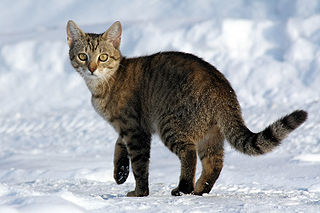

In [4]:
# checking the image file
display.display(display.Image(filename=cat_in_snow))
display.display(display.HTML('Image cc-by: <a "href=https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg">Von.grzanka</a>'))

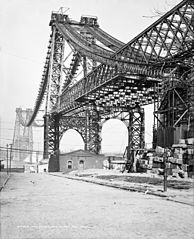

In [5]:
# checking the image file
display.display(display.Image(filename=williamsburg_bridge))
display.display(display.HTML('<a "href=https://commons.wikimedia.org/wiki/File:New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg">From Wikimedia</a>'))

In order to convert python data type to a standard TensorFlow type tf.train.Feature, we will use the functions below. Each of these functions takes scalar input value and returns a tf.train.Feature

In [6]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [7]:
_int64_feature(10)

int64_list {
  value: 10
}

In [8]:
# create a dictionary to map classes to images, 
# this will be helpful when we use image classification algorithm on dataset
image_labels = {
    cat_in_snow : 0,
    williamsburg_bridge : 1,
}

# Create a function to apply entire process to each element of dataset.
# process the two images into 'tf.Example' messages.
def image_example(image_string, label):
  """
  Creates a tf.Example message ready to be written to a file.
  """
  # Create a dictionary mapping the feature name to the tf.Example-compatible
  # data type.
  image_feature_description = {
      "image": _bytes_feature(image_string),
      "class": _int64_feature(label),
      }
  # Create a Features message using tf.train.Example.
  return tf.train.Example(features=tf.train.Features(feature=image_feature_description))

In [41]:
# define a filename to store preprocessed image data:...
record_file = 'images.tfrecords'

# Write the `tf.Example` observations to the file.
with tf.io.TFRecordWriter(record_file) as writer:
    for filename, label in image_labels.items():
        print('a')
        #image_string type: bytes
        image_string = open(filename, 'rb').read()
        
        # storing all the features in the tf.Example message.
        tf_example = image_example(image_string, label)
        # write the example messages to a file named images.tfrecords
        writer.write(tf_example.SerializeToString())
        
        

a
a


In [37]:
#allan
filename = 'C:\\Users\\allan.freitas\\.keras\\datasets\\320px-Felis_catus-cat_on_snow.jpg'
image_string = open(filename, 'rb').read()
        
# storing all the features in the tf.Example message.
tf_example = image_example(image_string, label)
#tf_example

In [65]:
# checking if file is written
!du -sh {record_file}

'du' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


## Read TFRecord file

In [66]:
# to read TFRecord file use TFRecordDataset
raw_image_dataset = tf.data.TFRecordDataset(record_file)

# Create a dictionary describing the features.
image_feature_description = {
    "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
    "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }

# create a function to apply image feature description to each observation
def _parse_image_function(example_proto):
  # parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

# use map to apply this operation to each element of dataset
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)

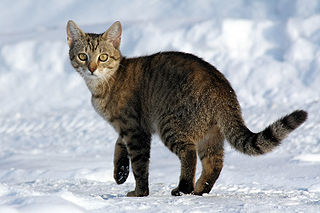

The label of image is 0


In [45]:
# Use the .take method to only pull one example from the dataset.
for image_features in parsed_image_dataset.take(1):
  image = image_features['image'].numpy()
  display.display(display.Image(data=image))
  classes = image_features['class'].numpy()
  print('The label of image is', classes)

Hence, The process of serializing data into TFRecord format will be: 
**Data -> FeatureSet (a dictionary of features)-> Example -> Serialized Example -> TFRecord.**

and to read it back, the process is reversed.
**TFRecord -> SerializedExample -> Example -> FeatureSet -> Data**

### On Flower Classification with TPUs


In [57]:
file = '00-192x192-798.tfrec'

In [58]:
# on 
# to read TFRecord file use TFRecordDataset
raw_image_dataset = tf.data.TFRecordDataset(file)

# Create a dictionary describing the features.
image_feature_description = {
    "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
    "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }

# create a function to apply image feature description to each observation
def _parse_image_function(example_proto):
  # parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

# use map to apply this operation to each element of dataset
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)

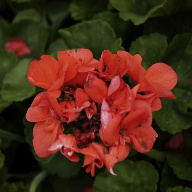

The label of image is 57


In [59]:
# Use the .take method to only pull one example from the dataset.
for image_features in parsed_image_dataset.take(1):
    image = image_features['image'].numpy()
    display.display(display.Image(data=image))
    classes = image_features['class'].numpy()
    print('The label of image is', classes)

Faster training on TPU:
===
Accoring to Google's team behind Colab's free TPU:
>"Artificial neural networks based on the AI applications used to train the TPUs are 15 and 30 times faster than CPUs and GPUs!"

So, how can we do that; As per my experimentation, when you use CPU and GPU static shape is not that important, but incase of XLA/TPU static shape and batch size makes a very big difference.

Hence, if you use static input batch_size i.e., train the TPU model with static batch_size*8 (number of TPU cores). The epoch time reduced to 20%-50% as compared to training model on GPU. Since colab TPU has 8 TPU cores which operates as independent processing units.

References:
===
1. https://www.dlology.com/blog/how-to-train-keras-model-x20-times-faster-with-tpu-for-free/

1. https://codelabs.developers.google.com/codelabs/keras-flowers-data/#4

1. https://www.tensorflow.org/tutorials/load_data/tfrecord

1. https://www.skcript.com/svr/why-every-tensorflow-developer-should-know-about-tfrecord/

Conclusion
===
This is just a first cut notebook on using tfrecord format. Also more rigorous experiment can be done and heuristics can be explored for faster preprocessing and training. I hope this helped you in understanding of using TensorFlow's TFRecords.

Comments, suggestions, criticism are welcomed. Thanks

### To be continued ................
